In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import IPython.display as display
import PIL.Image

## Load the InceptionV3 model

In [2]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Activations to use for deep dream

In [3]:
layers_names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in layers_names]

## Define the model

In [4]:
deepdream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)
deepdream_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Calculating loss

In [5]:
def calc_loss(image, model):
    # convert to batch format
    image_batch = tf.expand_dims(image, axis=0)
    # run the model
    layer_activations = model(image_batch)
    print("Layer activations", np.shape(layer_activations))

    # create an empty array to accumulate the losses
    losses = []
    for activation in layer_activations:
        # calculate the mean of each activation
        print("Activation", activation.shape)
        loss = tf.math.reduce_mean(activation)
        print("Loss", loss)
        losses.append(loss)

    print("Losses", losses)
    print("Sum of all losses", tf.reduce_sum(losses))

    # calcualte sum
    return tf.reduce_sum(losses)

## Gradient ascent

In [6]:
@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = calc_loss(image, model) 

    gradients = tape.gradient(loss, image)
    print("Gradient and image shapes")
    print("Gradient shape", gradients.shape)
    print("Image shape", image.shape)

    gradients /= tf.math.reduce_std(gradients)  

    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

## Deep dream algorithm

In [7]:
def run_deep_dream_simple(model, image, steps=100, step_size=0.01):
    image = tf.keras.applications.inception_v3.preprocess_input(image)

    for step in range(steps):
        loss, image = deepdream(model, image, step_size)
    
    if step % 100 == 0:
        plt.figure(figsize=(12,12))
        plt.imshow(deprocess(image))
        plt.show()
        print ("Step {}, loss {}".format(step, loss))

    plt.figure(figsize=(12,12))
    plt.imshow(deprocess(image))
    plt.show()

    return deprocess(image)

In [8]:
def deprocess(image):
    image = 255*(image + 1.0) / 2.0
    return tf.cast(image, tf.uint8)

## Image used for the experiment

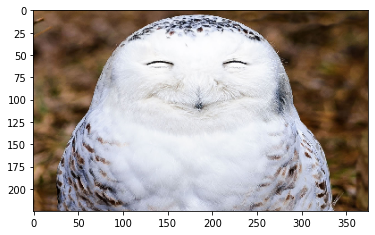

In [9]:
original_image = tf.keras.preprocessing.image.load_img("image.png", target_size=(225, 375))
plt.imshow(original_image)

Layer activations (2,)
Activation (1, 12, 21, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 12, 21, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (225, 375, 3)
Image shape (225, 375, 3)


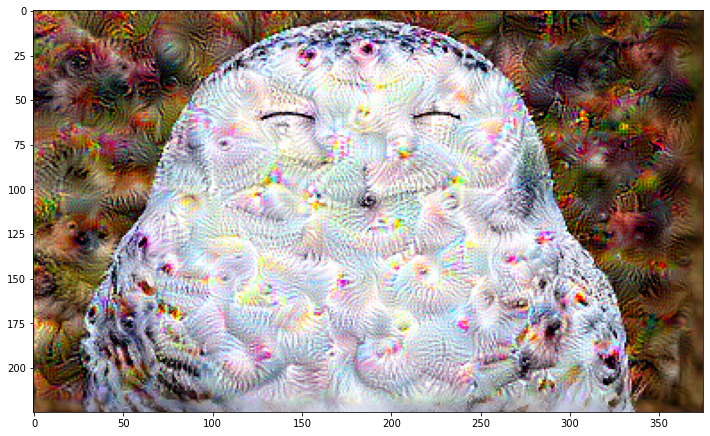

In [10]:
image = tf.keras.preprocessing.image.load_img("image.png", target_size = (225, 375))

image = np.array(image)
dream_img = run_deep_dream_simple(model=deepdream_model, image=image, 
                                  steps=2000, step_size=0.001)

Octave -2
Image shape (133, 221, 3)
Layer activations (2,)
Activation (1, 6, 12, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 6, 12, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (133, 221, 3)
Image shape (133, 221, 3)


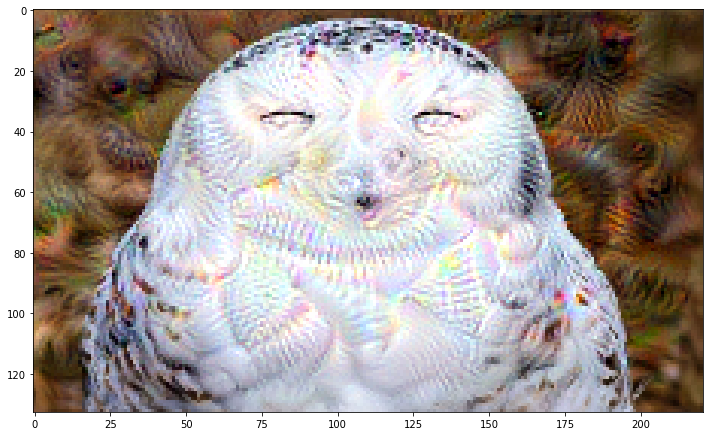

Octave -1
Image shape (173, 288, 3)
Layer activations (2,)
Activation (1, 9, 16, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 9, 16, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (173, 288, 3)
Image shape (173, 288, 3)


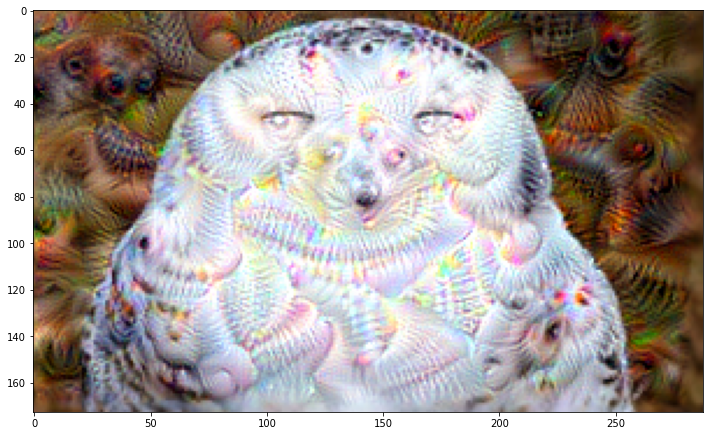

Octave 0
Image shape (225, 375, 3)
Layer activations (2,)
Activation (1, 12, 21, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 12, 21, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (225, 375, 3)
Image shape (225, 375, 3)


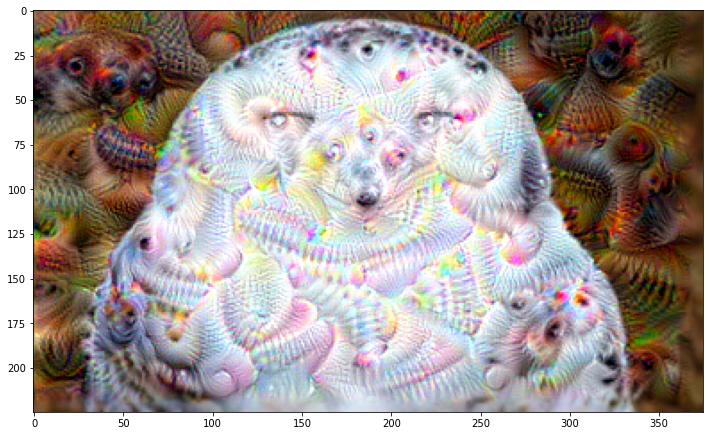

Octave 1
Image shape (292, 487, 3)
Layer activations (2,)
Activation (1, 16, 28, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 16, 28, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (292, 487, 3)
Image shape (292, 487, 3)


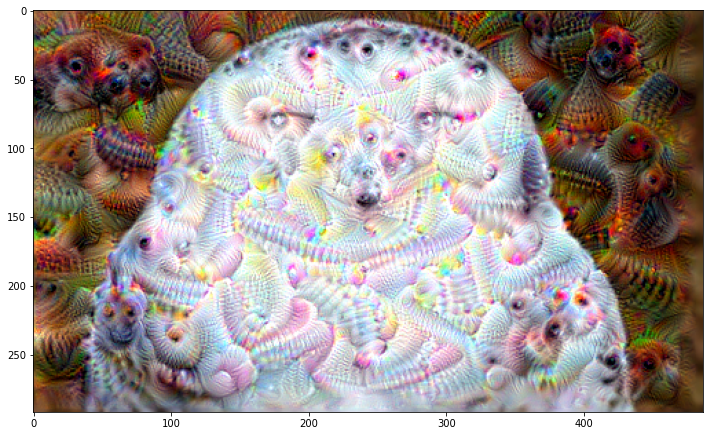

Octave 2
Image shape (380, 633, 3)
Layer activations (2,)
Activation (1, 22, 37, 768)
Loss Tensor("Mean:0", shape=(), dtype=float32)
Activation (1, 22, 37, 768)
Loss Tensor("Mean_1:0", shape=(), dtype=float32)
Losses [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
Sum of all losses Tensor("Sum:0", shape=(), dtype=float32)
Gradient and image shapes
Gradient shape (380, 633, 3)
Image shape (380, 633, 3)


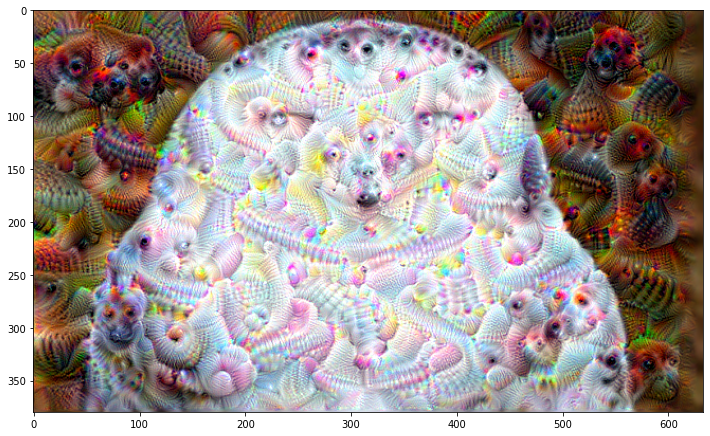

In [11]:
OCTAVE_SCALE = 1.30

img = tf.constant(np.array(original_image))
base_shape = tf.shape(img)[:-1]
float_base_shape = tf.cast(base_shape, tf.float32)

for n in range(-2, 3):
    print("Octave", n)
    new_shape = tf.cast(float_base_shape*(OCTAVE_SCALE**n), tf.int32)

    img = tf.image.resize(img, new_shape).numpy()
    print("Image shape", img.shape)

    img = run_deep_dream_simple(deepdream_model, img, steps=50, step_size=0.01)

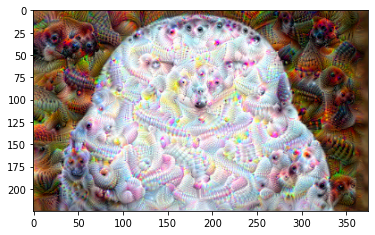

In [12]:
display.clear_output(wait=True)
img = tf.image.resize(img, base_shape)
img = tf.image.convert_image_dtype(img/255.0, dtype=tf.uint8)
plt.imshow(img)

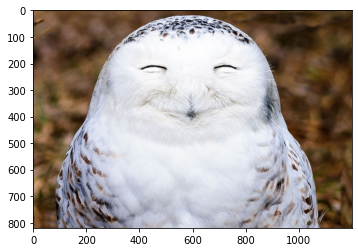

In [27]:
original_image = tf.keras.preprocessing.image.load_img("image.png")
plt.imshow(original_image)

In [28]:
original_full_size_image = np.copy(original_image)
full_size_shape = tf.shape(original_full_size_image)
float_full_size_shape = tf.cast(full_size_shape, tf.float32)
print(full_size_shape)

original_shrunk_shape = tf.cast(float_full_size_shape[:-1] * (OCTAVE_SCALE**-2), tf.int32)
print(original_shrunk_shape)

tf.Tensor([ 819 1200    3], shape=(3,), dtype=int32)
tf.Tensor([484 710], shape=(2,), dtype=int32)


In [15]:
original_full_size_image.shape

(819, 1200, 3)

In [16]:
float_base_shape

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([225., 375.], dtype=float32)>

In [17]:
OCTAVE_SCALE = 1.30

img = tf.constant(np.array(original_image))
base_shape = tf.shape(img)[:-1]
float_base_shape = tf.cast(base_shape, tf.float32)

print(tf.shape(img))
print(base_shape)
print(float_base_shape)

for n in range(-2, 3):
    print("Octave", n)
    new_shape = tf.cast(float_base_shape*(OCTAVE_SCALE**n), tf.int32)

    img = tf.image.resize(img, new_shape).numpy()
    print("Image shape", img.shape)

tf.Tensor([ 819 1200    3], shape=(3,), dtype=int32)
tf.Tensor([ 819 1200], shape=(2,), dtype=int32)
tf.Tensor([ 819. 1200.], shape=(2,), dtype=float32)
Octave -2
Image shape (484, 710, 3)
Octave -1
Image shape (630, 923, 3)
Octave 0
Image shape (819, 1200, 3)
Octave 1
Image shape (1064, 1560, 3)
Octave 2
Image shape (1384, 2028, 3)
